## Задача №1. Статистический анализ произведения К.И. Чуковского "Краденое солнце"

Дано: произведение К.И. Чуковского "Краденое Солнце".

Построить а.) гистограмму длин слов, б.) соответствующую выборочную функцию распределения и в.) подобрать ближайшее теоретическое нормальное (гауссовское) распределение.

In [19]:
#Импортируем нужные бибилиотеки
import string
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as st
import seaborn as sns
import numpy as np

### Подготовка исходных данных

Для корректного анализа необходимо удалить все знаки препинания из текста.

In [20]:
text = ['''Солнце по небу гуляло
И за тучу забежало.
Глянул заинька в окно,
Стало заиньке темно.
А сороки-
Белобоки
Поскакали по полям,
Закричали журавлям:
«Горе! Горе! Крокодил
Солнце в небе проглотил!»
Наступила темнота.
Не ходи за ворота:
Кто на улицу попал —
Заблудился и пропал.
Плачет серый воробей:
«Выйди, солнышко, скорей!
Нам без солнышка обидно —
В поле зёрнышка не видно!»
Плачут зайки
На лужайке:
Сбились, бедные, с пути,
Им до дому не дойти.
Только раки пучеглазые
По земле во мраке лазают,
Да в овраге за горою
Волки бешеные воют.
Рано-рано
Два барана
Застучали в ворота:
Тра-та-та и тра-та-та!
«Эй вы, звери, выходите,
Крокодила победите,
Чтобы жадный Крокодил
Солнце в небо воротил!»
Но мохнатые боятся:
«Где нам с этаким сражаться!
Он и грозен и зубаст,
Он нам солнца не отдаст!»
И бегут они к Медведю в берлогу:
«Выходи-ка ты, Медведь, на подмогу.
Полно лапу тебе, лодырю, сосать.
Надо солнышко идти выручать!»
Но Медведю воевать неохота:
Ходит-ходит он, Медведь, круг болота,
Он и плачет, Медведь, и ревёт,
Медвежат он из болота зовёт:
«Ой, куда вы, толстопятые, сгинули?
На кого вы меня, старого, кинули?»
А в болоте Медведица рыщет,
Медвежат под корягами ищет:
«Куда вы, куда вы пропали?
Или в канаву упали?
Или шальные собаки
Вас разорвали во мраке?»
И весь день она по лесу бродит,
Но нигде медвежат не находит.
Только чёрные совы из чащи
На неё свои очи таращат.
Тут зайчиха выходила
И Медведю говорила:
«Стыдно старому реветь —
Ты не заяц, а Медведь.
Ты поди-ка, косолапый,
Крокодила исцарапай,
Разорви его на части,
Вырви солнышко из пасти.
И когда оно опять
Будет на небе сиять,
Малыши твои мохнатые,
Медвежата толстопятые,
Сами к дому прибегут:
«Здравствуй, дедушка, мы тут!»
И встал
Медведь,
Зарычал
Медведь,
И к Большой Реке
Побежал
Медведь.
А в Большой Реке
Крокодил
Лежит,
И в зубах его
Не огонь горит, -
Солнце красное,
Солнце краденое.
Подошёл Медведь тихонько,
Толканул его легонько:
«Говорю тебе, злодей,
Выплюнь солнышко скорей!
А не то, гляди, поймаю,
Пополам переломаю, -
Будешь ты, невежа, знать
Наше солнце воровать!
Ишь разбойничья порода:
Цапнул солнце с небосвода
И с набитым животом
Завалился под кустом
Да и хрюкает спросонья,
Словно сытая хавронья.
Пропадает целый свет,
А ему и горя нет!»
Но бессовестный смеётся
Так, что дерево трясётся:
«Если только захочу,
И луну я проглочу!»
Не стерпел
Медведь,
Заревел
Медведь,
И на злого врага
Налетел
Медведь.
Уж он мял его
И ломал его:
«Подавай сюда
Наше солнышко!»
Испугался Крокодил,
Завопил, заголосил,
А из пасти
Из зубастой
Солнце вывалилось,
В небо выкатилось!
Побежало по кустам,
По берёзовым листам.
Здравствуй, солнце золотое!
Здравствуй, небо голубое!
Стали пташки щебетать,
За букашками летать.
Стали зайки
На лужайке
Кувыркаться и скакать.
И глядите: медвежата,
Как весёлые котята,
Прямо к дедушке мохнатому,
Толстопятые, бегут:
«Здравствуй, дедушка, мы тут!»
Рады зайчики и белочки,
Рады мальчики и девочки,
Обнимают и целуют косолапого:
«Ну, спасибо тебе, дедушка, за солнышко!»''']

text2 = ''.join(w for w in text[0] if w not in string.punctuation and w not in ['«', '»', '—'])
#Проверка
#print(text2)

In [21]:
#Вывод из файла, опциональное лаконичное решение.
#f = open('/content/drive/MyDrive/Colab Notebooks/test_ks/stolen_sun_utf8.txt', "r", encoding="utf-8")
#text3 = f.read().replace('\xa0', ' ').replace('\n', ' ')
#text4 = ''.join(w for w in text3 if w not in string.punctuation and w not in ['«', '»', '—'])

Преобразуем текст в датафрейм и добавим столбец с количеством букв в каждом слове.

In [22]:
words = text2.replace('\n', ' ').split()
words = pd.DataFrame(words)
words.rename(columns={0: 'words'}, inplace=True)
words['len'] = words.apply(lambda x: len(x['words']), axis = 1)
words.head()

,words,len
0,Солнце,6
1,по,2
2,небу,4
3,гуляло,6
4,И,1


Построим гистограмму распределения частоты встречающихся в тексте слов определенной длины. На график добавим линию kde, оценку плотности ядра, которая покажет приближенную функцию распределения.

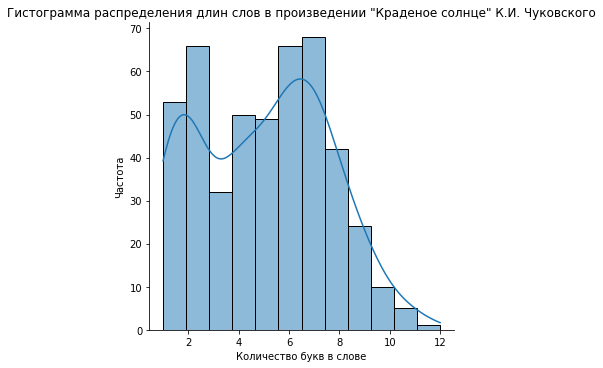

In [23]:
sns.displot(words['len'], kde = True, bins = 12)
plt.title('Гистограмма распределения длин слов в произведении "Краденое солнце" К.И. Чуковского')
plt.xlabel('Количество букв в слове')
plt.ylabel('Частота')
plt.show()

Ближайшее к полученному теоретическое распределение - распределение Пуассона. Смещение пика гистограммы происходит за счет активного использования предлогов, союзов и междометий в русском языке. Для частотного смыслового анализа их необходимо будет исключить.

## Задача №2. На сайте Яндекс.Погода взять данные по погоде днем на ближайшие 16 дней и построить для этого временного ряда быстрое преобразование Фурье. Что можно сказать об этом преобразовании?

API Яндекс-Погоды не позволяет бесплатно получать долгосрочный прогноз. Воспользуемся открытыми данными с ресурса <code>[gridforecast.com](http://gridforecast.com)</code>. Он позволяет получить ссылку на ежедневный прогноз на 16 дней. 

In [24]:
import requests
#from bs4 import BeautifulSoup
import json
import re
from datetime import timedelta, date

In [25]:
def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

start_date = date(2021, 10, 11)
end_date = date(2021, 10, 27)
dates = []
for single_date in daterange(start_date, end_date):
  dates.append(single_date.strftime("%Y%m%d"))
dates

['20211011',
 '20211012',
 '20211013',
 '20211014',
 '20211015',
 '20211016',
 '20211017',
 '20211018',
 '20211019',
 '20211020',
 '20211021',
 '20211022',
 '20211023',
 '20211024',
 '20211025',
 '20211026']

In [26]:
urls = []
for i in dates:
  date_url = 'https://gridforecast.com/api/v1/forecast/55.7434;37.6144/' + i + '1200?api_token=aMbLqamCYeMSYJF5'
  urls.append(date_url)
urls

['https://gridforecast.com/api/v1/forecast/55.7434;37.6144/202110111200?api_token=aMbLqamCYeMSYJF5',
 'https://gridforecast.com/api/v1/forecast/55.7434;37.6144/202110121200?api_token=aMbLqamCYeMSYJF5',
 'https://gridforecast.com/api/v1/forecast/55.7434;37.6144/202110131200?api_token=aMbLqamCYeMSYJF5',
 'https://gridforecast.com/api/v1/forecast/55.7434;37.6144/202110141200?api_token=aMbLqamCYeMSYJF5',
 'https://gridforecast.com/api/v1/forecast/55.7434;37.6144/202110151200?api_token=aMbLqamCYeMSYJF5',
 'https://gridforecast.com/api/v1/forecast/55.7434;37.6144/202110161200?api_token=aMbLqamCYeMSYJF5',
 'https://gridforecast.com/api/v1/forecast/55.7434;37.6144/202110171200?api_token=aMbLqamCYeMSYJF5',
 'https://gridforecast.com/api/v1/forecast/55.7434;37.6144/202110181200?api_token=aMbLqamCYeMSYJF5',
 'https://gridforecast.com/api/v1/forecast/55.7434;37.6144/202110191200?api_token=aMbLqamCYeMSYJF5',
 'https://gridforecast.com/api/v1/forecast/55.7434;37.6144/202110201200?api_token=aMbLqamCY

In [27]:
temp = []
for i in urls:
  req = requests.get(i)
  req.encoding = 'utf-8'
  x = req.text
  y = json.loads(x)
  temp.append(int(y['t']))


In [28]:
data = pd.DataFrame(dates, columns = ['date'])
data['temp'] = temp
data

,date,temp
0,20211011,11
1,20211012,12
2,20211013,11
3,20211014,9
4,20211015,9
5,20211016,9
6,20211017,11
7,20211018,3
8,20211019,3
9,20211020,5


In [29]:
#Строим БПФ для дискретного ряда с помощью модуля библиотеки numpy.
X = np.fft.rfft(data['temp'])
#Проверка, обратное преобразование
#X_inverse = np.fft.irfft(X)

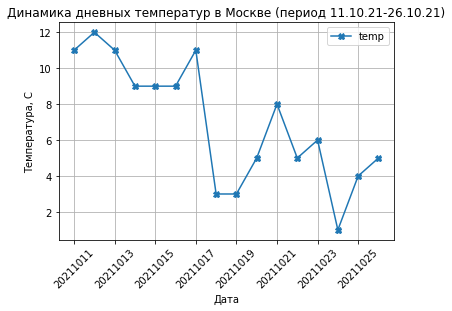

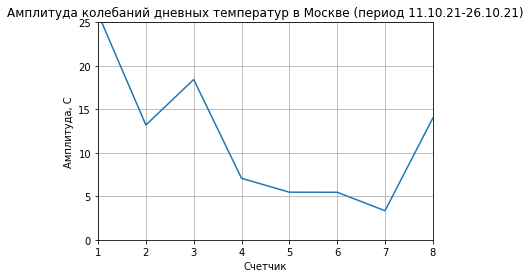

In [30]:
#Строим график динамики дневных температур на основе исходных данных
data.plot(x = 'date', y = 'temp', marker = 'X')
plt.title('Динамика дневных температур в Москве (период 11.10.21-26.10.21)')
plt.grid(True)
plt.xlabel('Дата')
plt.xticks(rotation = 45)
plt.ylabel('Температура, С')
plt.show()
#График на основе БПФ симметричен, выводим только левую часть. На графике будут отображены накопленные значения.
plt.plot(abs(X))
plt.title('Амплитуда колебаний дневных температур в Москве (период 11.10.21-26.10.21)')
plt.grid(True)
#"Обрезаем" нулевую частоту для коррктного отображения графика
plt.xlim(1,8)
plt.ylim(0,25)
plt.xlabel('Счетчик')
plt.ylabel('Амплитуда, С')
plt.show()
#Проверка, график обратного преобразования
#plt.plot(abs(X_inverse))
#plt.title('Восстановленная функция динамики дневных температур в Москве (период 11.10.21-26.10.21)')
#plt.grid(True)
#plt.xlabel('Дата')
#plt.ylabel('Температура, С')
#plt.show()


График амплитуды колебаний дневных температур, полученный на основе БПФ, не очень информативен из-за малого количества наблюдений. В любом случае он показывает, что с увеличением количества наблюдений амплитуда сокращается (но из-за последнего скачка температуры от 1 к 4-5 градусам опять немного растет).

In [31]:
#Тестовые данные на случай "падения" погодного ресурса
#data_temp = pd.DataFrame(dates, columns = ['date'])
#data_temp['temp'] = ['10', '12', '14', '8', '2', '5', '8', '4', '1', '8', '6', '5', '9', '9', '6', '2']
#data_temp['temp'] = data_temp['temp'].astype(int)
#data_temp

## Задача №3. Для того же ряда (из п. 2) построить приближение методом наименьших квадратов из класса прямых и из класса экспонент.

### Линейная аппроксимация методом наименьших квадратов

In [32]:
#Добавлям столбец со значениями индексов в качестве счетчика х
data = data.reset_index()
data['index'] = data['index'] +1

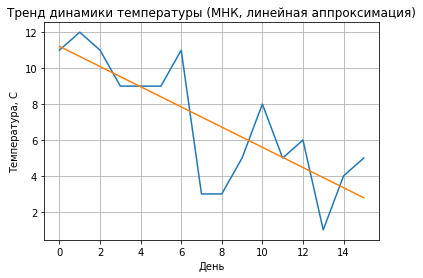

In [33]:
# С помощью метода polyfit создаем линейный тренд методом МНК (степень 1 в параметрах)
fit = np.polyfit(data['index'], data['temp'], 1)
#Создаем нужный полином
fit_function = np.poly1d(fit)
#график исходных данных
plt.plot(data['temp'])
plt.title('Тренд динамики температуры (МНК, линейная аппроксимация)')
plt.grid(True)
plt.xlabel('День')
plt.ylabel('Температура, С')
#график линейной аппроксимации
plt.plot(fit_function(data['index']))
plt.show()

In [34]:
print('Метод линейной аппроксимации по исходным данным предсказывает, что на Новый год будет {:.0f} градусов.'.format(fit_function(81)))

Метод линейной аппроксимации по исходным данным предсказывает, что на Новый год будет -34 градусов.


### Экспоненциальная аппроксимация методом наименьших квадратов

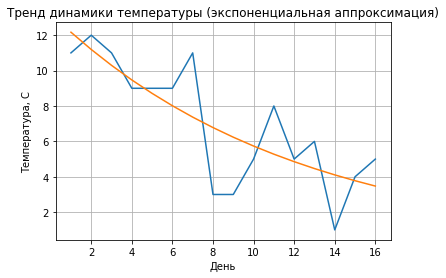

In [35]:
#Для экспоненциальной аппроксимации готового метода нет. Воспользуемся "подгонкой" вида функции с помощью curve_fit
from scipy.optimize import curve_fit
#подбор коэффициентов для функции аппроксимации
[a, b], res1 = curve_fit(lambda x1,a,b: a*np.exp(b*x1),  data['index'],  data['temp'])
y1 = a * np.exp(b * data['index'])
# Исходный график
plt.plot(data['index'], data['temp'])
plt.title('Тренд динамики температуры (экспоненциальная аппроксимация)')
plt.grid(True)
plt.xlabel('День')
plt.ylabel('Температура, С')
# График экспоненциального тренда
plt.plot(data['index'], y1)
plt.show()

In [36]:
print('Метод экспоненциальной аппроксимации по исходным данным предсказывает, что на Новый год будет {:.0f} градусов.'.format(a * np.exp(b * 81)))

Метод экспоненциальной аппроксимации по исходным данным предсказывает, что на Новый год будет 0 градусов.


Сложно сказать, какой прогноз ближе к реальности - слишком короткий период наблюдений взят нами за основу. Для долгосрочных предсказаний эти тренды использовать нельзя.